### ESMA 4016
### Regresion y Correlacion Lineal  Simple
### Edgar Acuna

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
import plotnine
from plotnine import *
%matplotlib inline

In [62]:
#Ejemplo 1
years=[3,4,6,7,8,12,15,20,22,26]
ventas=[9,12,16,19,23,27,34,37,40,45]

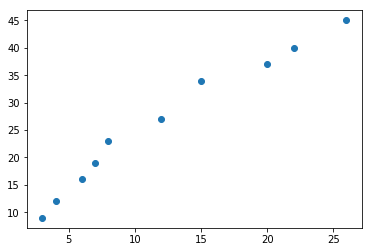

In [63]:
#Haciendo el scatterplot
plt.scatter(years,ventas)

In [64]:
#Hallando la correlacion usando numpy
np.corrcoef(years,ventas)[0][1]

0.98359288936594169

Comentario: Muy biena relacion lineal entre years y ventas. Cuando los anos de experiencia aumentan, las ventas tieneden a aumentar

In [65]:
#Hallando los coeficentes de la linea de regresion usando numpy
intercepto, slope= np.poly1d(np.polyfit(years, ventas, 1))
print intercepto, slope

1.50720216912 7.66141331978


In [66]:
#Preparando el dataframe para usar pandas
data=[years,ventas]
data=np.transpose(data)
df=pd.DataFrame(data,columns=['years','ventas'])
df

,years,ventas
0,3,9
1,4,12
2,6,16
3,7,19
4,8,23
5,12,27
6,15,34
7,20,37
8,22,40
9,26,45


In [67]:
#Calculando la correlacion con pandas
df.corr()["years"]["ventas"]

0.9835928893659418

In [68]:
# Hallando la regresion con statmodels
result = sm.ols(formula="ventas ~ years", data=df).fit()
print result.params

Intercept    7.661413
years        1.507202
dtype: float64


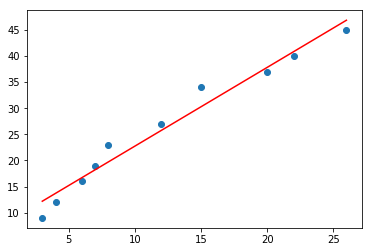

In [69]:
#Trazando la linea de regresion sobre el plot de puntos
x=years
y=ventas
plt.scatter(x,y)
plt.plot(x, np.poly1d(np.polyfit(x, y, 1))(x),color='red')

plt.show()

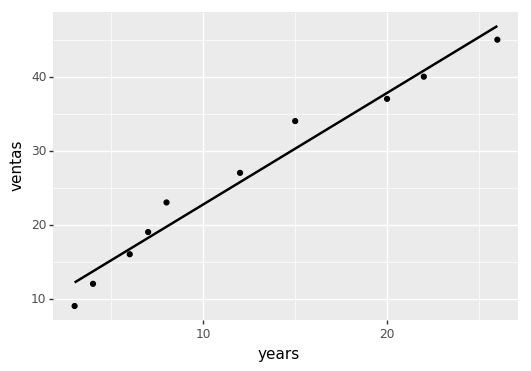

<ggplot: (17570908)>

In [71]:
#usando ggplot con la libreia plotnine
(ggplot(df, aes(x='years',y='ventas'))+geom_point()+geom_smooth(method="lm",se=False))

In [72]:
#Ejemplo 2
df = pd.read_csv('http://academic.uprm.edu/eacuna/casas.txt',sep='\s+')
df.head()

,area,precio
0,3060,179000
1,1600,126500
2,2000,134500
3,1300,125000
4,2000,142000


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
area      15 non-null int64
precio    15 non-null int64
dtypes: int64(2)
memory usage: 312.0 bytes


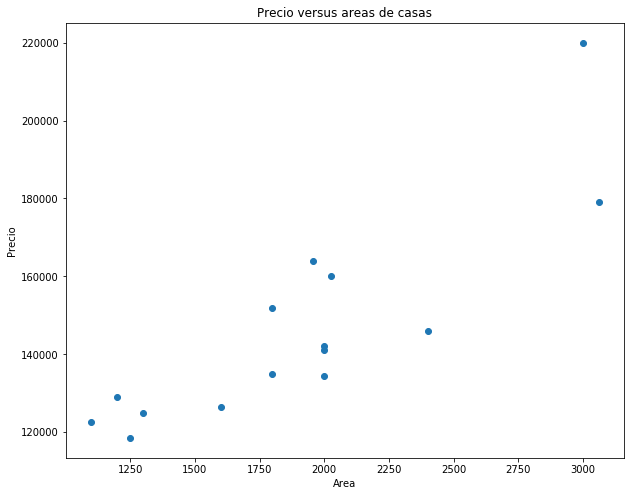

In [74]:
# Haciendp el scatterplot
plt.figure(figsize=(10,8))

# Create a scatterplOT
plt.scatter(df['area'], df['precio'])

# Chart title
plt.title('Precio versus areas de casas')

# y label
plt.ylabel('Precio')

# x label
plt.xlabel('Area')



plt.show()

In [75]:
# Hallando la correlacion
df.corr()['area']['precio']

0.85817992447432723

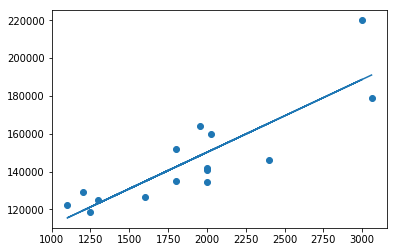

In [76]:
#Trazando la linea de regresion junto con los data points
x=df['area']
y=df['precio']
plt.scatter(x,y)
plt.plot(x, np.poly1d(np.polyfit(x, y, 1))(x))

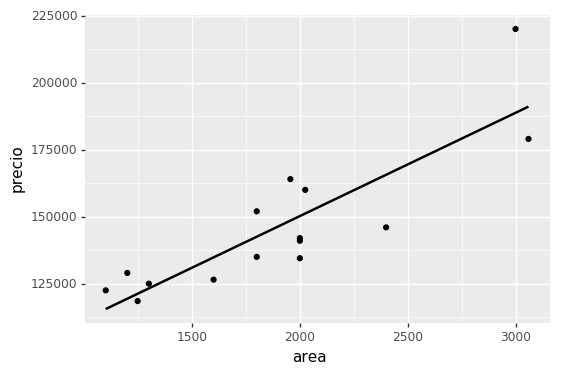

<ggplot: (18078265)>

In [77]:
#usando ggplot con la libreia plotnine
(ggplot(df, aes(x='area',y='precio'))+geom_point()+geom_smooth(method="lm",se=False))

In [78]:
#Hallando los resultados completos de la regresion
result = sm.ols(formula="precio ~ area", data=df).fit()
print result.params
print result.summary()

Intercept    73167.748381
area            38.523071
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                 precio   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.716
Method:                 Least Squares   F-statistic:                     36.33
Date:                Thu, 08 Mar 2018   Prob (F-statistic):           4.25e-05
Time:                        13:00:34   Log-Likelihood:                -163.54
No. Observations:                  15   AIC:                             331.1
Df Residuals:                      13   BIC:                             332.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------